# <center>Tugas 5 AeroTraining</center>

## Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## importing and checking the data

In [186]:
df = pd.read_csv('train.csv')

In [187]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## data cleaning, imputation, and preparation

<AxesSubplot:>

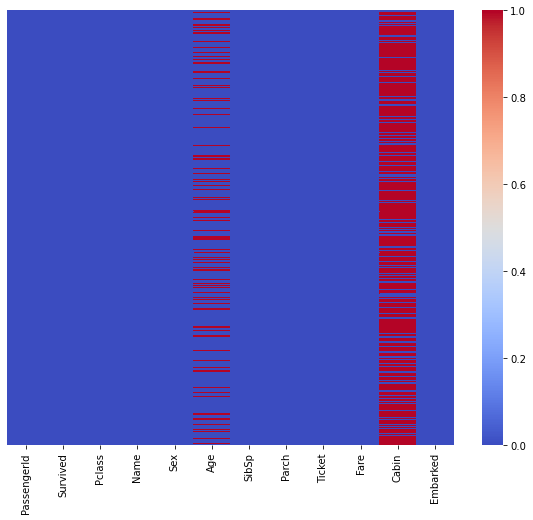

In [189]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm')

In [190]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [191]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

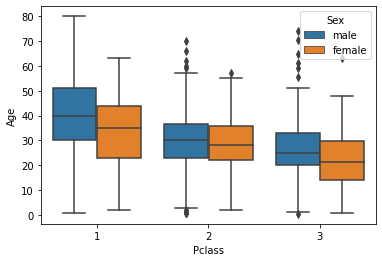

In [192]:
sns.boxplot(x='Pclass', y='Age', data=df, hue='Sex')

In [193]:
k=0
for i in range(1,4):
    for j in df['Sex'].unique():
        k = k+1
        mean_age_k = round(df[(df['Pclass']==i) & (df['Sex']==j)]['Age'].mean(),0)
        print('the mean age of {} passengers in class {} is {}'.format(j,i,mean_age_k))

the mean age of male passengers in class 1 is 41.0
the mean age of female passengers in class 1 is 35.0
the mean age of male passengers in class 2 is 31.0
the mean age of female passengers in class 2 is 29.0
the mean age of male passengers in class 3 is 27.0
the mean age of female passengers in class 3 is 22.0


In [194]:
def impute_age(columns):
    Pclass = columns[0]
    Sex = columns[1]
    Age = columns[2]
    
    if pd.isnull(Age):
        if (Pclass==1) & (Sex=='male'):
            return 41
        elif (Pclass==1) & (Sex=='female'):
            return 35
        elif (Pclass==2) & (Sex=='male'):
            return 31
        elif (Pclass==2) & (Sex=='female'):
            return 29
        elif (Pclass==3) & (Sex=='male'):
            return 27
        else:
            return 22
    else:
        return Age

In [195]:
df['Age'] = df[['Pclass', 'Sex', 'Age']].apply(impute_age, axis=1)

<AxesSubplot:>

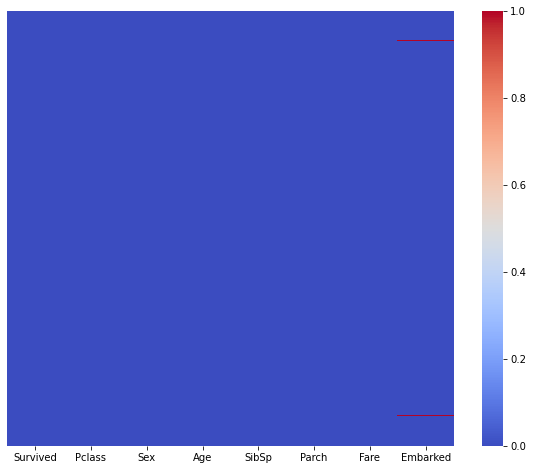

In [196]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm')

In [197]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [198]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [199]:
df = pd.concat([df, sex, embark], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,0,3,female,22.0,1,2,23.4500,S,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [200]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Train-test split

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [203]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=136)

## Logistic regression model for survival classification and evaluation

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
logistic = LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [206]:
logistic_predict = logistic.predict(X_test)

In [207]:
from sklearn.metrics import classification_report,confusion_matrix

In [208]:
print('classification report:')
print(classification_report(y_test, logistic_predict))
print('\n confusion matrix:')
print(confusion_matrix(y_test, logistic_predict))

classification report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       160
           1       0.79      0.68      0.73       107

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267


 confusion matrix:
[[141  19]
 [ 34  73]]


## Decision trees for survival classification and evaluation

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
dec_tree = DecisionTreeClassifier()

In [211]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [212]:
dec_tree_predict = dec_tree.predict(X_test)

In [213]:
print('classification report:')
print(classification_report(y_test, dec_tree_predict))
print('\n confusion matrix:')
print(confusion_matrix(y_test, dec_tree_predict))

classification report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.69      0.74      0.71       107

    accuracy                           0.76       267
   macro avg       0.75      0.76      0.76       267
weighted avg       0.77      0.76      0.77       267


 confusion matrix:
[[125  35]
 [ 28  79]]


## SVM classification for survival classification and evaluation

In [214]:
from sklearn.svm import SVC

In [215]:
sup_vec_mac = SVC()

In [216]:
sup_vec_mac.fit(X_train, y_train)

SVC()

In [217]:
sup_vec_mac_predict = sup_vec_mac.predict(X_test)

In [218]:
print('classification report:')
print(classification_report(y_test, sup_vec_mac_predict))
print('\n confusion matrix:')
print(confusion_matrix(y_test, sup_vec_mac_predict))

classification report:
              precision    recall  f1-score   support

           0       0.65      0.93      0.76       160
           1       0.69      0.23      0.35       107

    accuracy                           0.65       267
   macro avg       0.67      0.58      0.56       267
weighted avg       0.66      0.65      0.60       267


 confusion matrix:
[[149  11]
 [ 82  25]]


In [219]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV

In [220]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [221]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [222]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [223]:
grid_predictions = grid.predict(X_test)
print('classification report:')
print(classification_report(y_test, grid_predictions))
print('\n confusion matrix:')
print(confusion_matrix(y_test, grid_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       160
           1       0.74      0.74      0.74       107

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267


 confusion matrix:
[[132  28]
 [ 28  79]]


## Prediction of a single data point using the three models

In [243]:
logistic.predict([[1, 25.0, 1, 0, 70.0, 1, 0, 1]])

array([0], dtype=int64)

In [242]:
dec_tree.predict([[1, 25.0, 1, 0, 70.0, 1, 0, 1]])

array([1], dtype=int64)

In [241]:
grid.predict([[1, 25.0, 1, 0, 70.0, 1, 0, 1]])

array([0], dtype=int64)